<a href="https://colab.research.google.com/github/AravaChoudhary/ML-Pipeline-/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=1)

Text(0.5, 1.0, 'Scatter Plot')

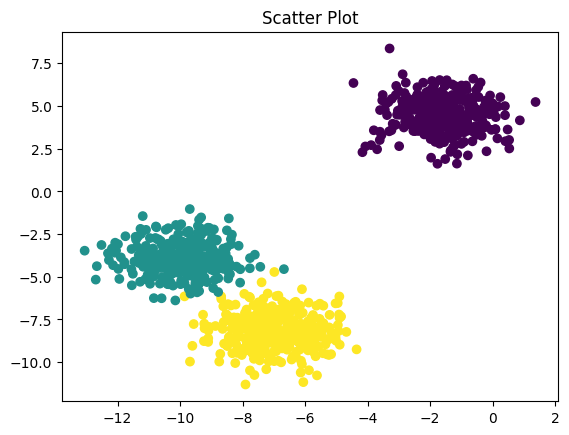

In [42]:
# Unsupervised Learning --> we will be only using X , not using y
plt.scatter(X[:,0],X[:,1] , c=y) # y is actual y on complete data
plt.title("Scatter Plot")

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [27]:
y_label = kmeans.predict(X_train)

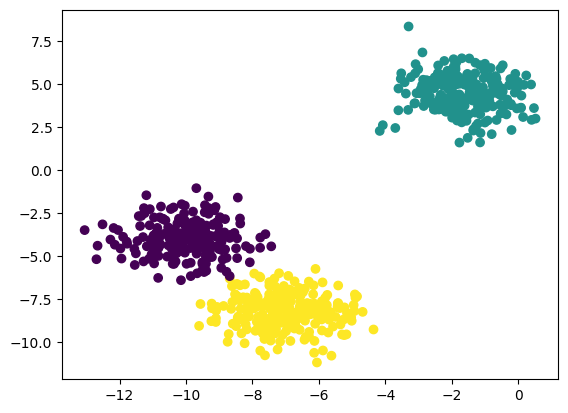

In [28]:
plt.scatter(X_train[:,0],X_train[:,1] , c=y_label) # on train data, y_label is predicted on train data

In [30]:
# Evaluation of this Clustering Model
from sklearn.metrics import silhouette_score
silhouette_score(X_train,kmeans.labels_) # close to 1 we have made a good model

0.7179451230427786

In [31]:
kmeans.inertia_ # this is WCSS Distance for k=3

1405.7366590440085

In [34]:
# Selecting Optimal K(centroid) value --> Using Elbow Method
wcss = []
for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

wcss # WCSS is Decreasing

[29004.511743610456,
 4501.242392684225,
 1405.68005178494,
 1241.970397289868,
 1045.391702972293,
 973.587878159107,
 931.7839260589982,
 712.0069537837956,
 668.3695823504034]

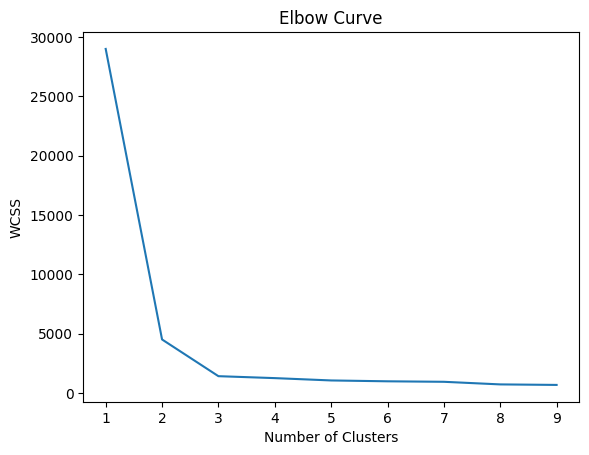

In [43]:
# plot the elbow curve
plt.plot(range(1,10),wcss)
plt.xticks(range(1,10))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Curve")
plt.show()

In [36]:
# based on the plot above the optimal k is equal to 3

In [37]:
!pip install kneed

In [38]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,10),wcss,curve='convex',direction='decreasing')
k1.elbow

2

In [40]:
silhoutte_coef = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  silhoutte_coef.append(score)

silhoutte_coef

[0.7674998364431159,
 0.7179451230427786,
 0.5922260446302542,
 0.4907749726886381,
 0.32550227165990464,
 0.3253517326090996,
 0.34279788815815737,
 0.33420249081722214]

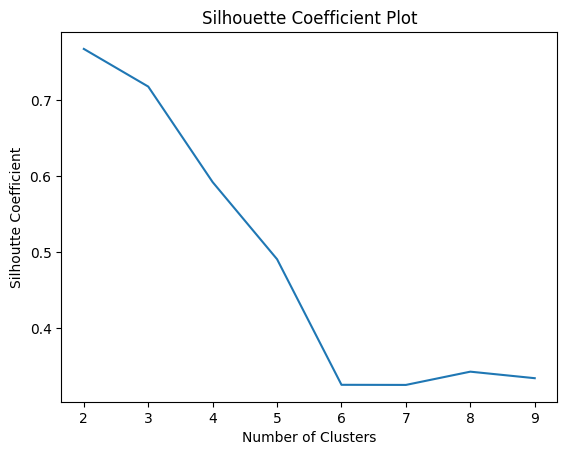

In [44]:
plt.plot(range(2,10),silhoutte_coef)
plt.xticks(range(2,10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficient")
plt.title("Silhouette Coefficient Plot")
plt.show()

In [ ]:
# for k=2 , we are getting Maximum Silhoutte Score , so k=2 is Optimal k